# Item 1

## The Challenge

An eccentric but wealthy investor has spent millions of dollars building a flying saucer prototype. He is offering a prize of 10 Bitcoin to the person who can come up with a mathematical model that best predicts the flying saucer's height (in meters) as a function of time during its initial launch.

The data has been e-mailed to us as a .csv file called "height_data_basic.csv". It represents the height of the flying saucer(in meters) during the first 7 seconds of the saucer's launch. We have no other information. 

In [1]:
import pandas as pd

In [2]:
height_df = pd.read_csv("height_data_basic.csv")
height_df.head()

,Unnamed: 0,time,height
0,0,0.009683,10.296167
1,1,0.018922,10.548359
2,2,0.027022,10.722826
3,3,0.032868,10.919808
4,4,0.055189,11.682872


In [3]:
height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   time        800 non-null    float64
 2   height      800 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 18.8 KB


In [4]:
time_data = height_df["time"].values.reshape(-1, 1)

In [5]:
height_data = height_df["height"]  # target -- No need to reshape

Let's try plotting the data.

In [6]:
import matplotlib.pyplot as plt

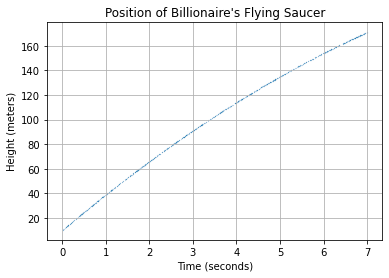

In [7]:
plt.scatter(time_data, height_data, marker=".", s=0.05)
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.title("Position of Billionaire's Flying Saucer")
plt.grid(True)
plt.show()

Now let's look at the correlation (r correlation coefficient) between these two variables.

In [8]:
height_df["time"].corr(height_df["height"])

0.9968113239576213

One thing we can do to avoid over-fitting on the training data is to split our data into training set and test set.

We fit on training set, then we evaluate our model on the test set.

Fit on training set better than fit on test set is a sign of potential over-fitting.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
time_train, time_test, height_train, height_test = train_test_split(
    time_data, height_data, train_size=0.7)

* * *

# Item 2

The first thing we will do is create a linear regression object.

In [11]:
lm = LinearRegression()

Fit the LinearRegression ONLY on the training data.

In [12]:
lm.fit(time_train, height_train)  # Fits linear model to train data

LinearRegression()

The score method gives me the $r^2$ (coefficient of determination).

$r^2$ takes values between 0 and 1.  It tells how well the proposed model fits the data.

In [13]:
lm.score(time_train, height_train)  # Testing the fit on the training set.

0.9938943726572578

In [14]:
lm.score(time_test, height_test)  # Testing the fit on the test set.

0.9929706437985745

Looks awesome so far! Very high accuracy on both the training data and test data. We are on our way to 10 BTC!!!

1. Plot the original scatter plot vs line of best fit

2. Plot of x-input vs residuals

3. Plot of actual value vs residuals

In [15]:
ht_pred = lm.predict(time_data)

We should plot our line of best fit against our model.

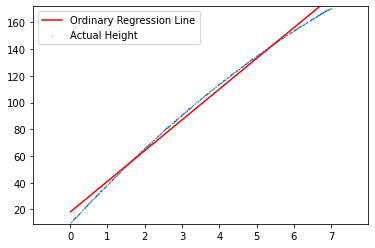

In [16]:
# Create scatter plot
plt.scatter(height_df["time"],
            height_df["height"],
            0.05,
            label="Actual Height")

# Create line plot
plt.plot(height_df["time"],
         ht_pred,
         color="red",
         label="Ordinary Regression Line")

# Edit axes
plt.xlim(height_df["time"].min() - 1,
         height_df["time"].max() + 1)  # change x-axis
plt.ylim(height_df["height"].min() - 1,
         height_df["height"].max() + 1)  # change y-axis

# Print labels
plt.legend()
plt.show()

Let's plot the **residuals** -- the difference between the observed value and the predicted value.

If our linear model is accurate, *the residuals should show random ``noise.''

In [17]:
ht_residuals = height_data - ht_pred # actual(observed) - predicted

In [18]:
# View residuals
ht_residuals

0     -8.027627
1     -7.987702
2     -7.999332
3     -7.936659
4     -7.686406
         ...   
795   -7.441992
796   -7.678437
797   -7.853143
798   -7.818979
799   -7.855609
Name: height, Length: 800, dtype: float64

Plot the residuals against the time data

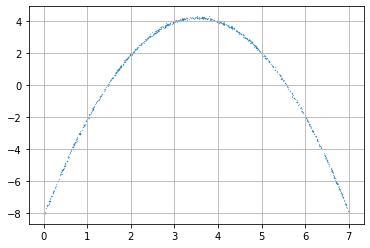

In [19]:
plt.scatter(time_data, ht_residuals, s = 0.05)
plt.grid(True)
plt.show()

Uh-oh. Our residuals should show no clear pattern; this one clearly has a quadratic pattern. This tells us that we're missing some part of the data that would be explained by the quadratic.

We can also look at a plot of actual values vs. residuals. (This also works in higher dimensions.)

* * *
 
# Item 3

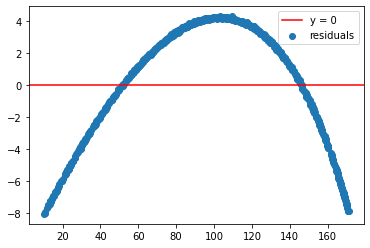

In [20]:
# plotting output v error
plt.scatter(height_data, ht_residuals, label = "residuals")
plt.axhline(y=0, color = 'red', label = 'y = 0') # see which residuals are positive/negative
plt.legend()
plt.show()

This is a <span style = "color: red"> bad </span> model, despite the fact that there is a high fit. The residuals show a clear pattern. <h1> <span style = "color:red"> You  never want the residuals to show a clear pattern. If they do, this means there is some aspect of the data that your model is failing to capture. </span> </h1>

For what comes next, it will be helpful to put our data columns separately from the original data frame.  

We *should* really do a test-train split again, but we'll skip it this time since we're going to illustrate plenty. 

We can introduce higher-order terms for height by using the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) preprocessor in sklearn. 

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [22]:
example = np.array([1, 2, 3]).reshape(-1,1)

In [23]:
poly_fit_example = PolynomialFeatures(degree = 2, include_bias=False) # adds on a degree -2 term

In [24]:
poly_fit_example.fit_transform(example)

array([[1., 1.],
       [2., 4.],
       [3., 9.]])

* * *

# Item 4

Now let's add quadratic features to our ht_data.

In [25]:
poly_fit = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
qm = LinearRegression() # qm stands for quadratic model

Now we make a **pipeline**, which is a way of creating a multi-step data-fitting procedure as one object. 

In [27]:
from sklearn.pipeline import make_pipeline

In [28]:
quad_reg = make_pipeline(poly_fit, qm) #quad_reg = quadratic regression

In [29]:
quad_reg.fit(time_data, height_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [30]:
qm.coef_

array([30.00483755, -1.00053501])

In [31]:
qm.intercept_

9.99281490076433

A pipeline enables data transformation and regression in one process

We see that the model predicted by the quadratic regression is
$$h(t) = -1.000t^2 + 30.004 + 9.992$$



* * *

# Item 6

In [32]:
quad_reg.score(time_data, height_data) # get the r^2 value for this idea

0.9999989763780012

Plot the data and the model again.

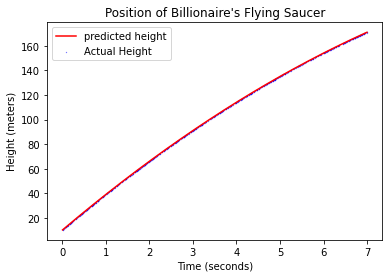

In [33]:
plt.scatter(time_data, height_data, 0.05, color="blue", label='Actual Height')
plt.plot(time_data, quad_reg.predict(time_data), color="red", label='predicted height')
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.title("Position of Billionaire's Flying Saucer")
plt.legend()
plt.show()

 We should also do our residual plots.

In [34]:
ht_pred = quad_reg.predict(time_data)

In [35]:
ht_quad_residuals = height_data - ht_pred

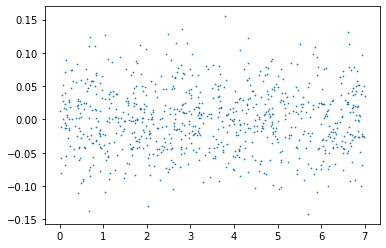

In [36]:
plt.scatter(time_data, ht_quad_residuals, 0.5)
plt.show()

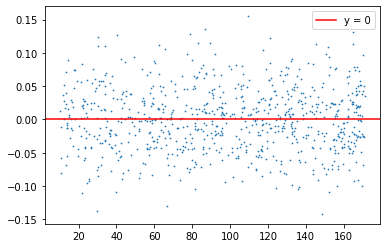

In [37]:
plt.scatter(height_data, ht_quad_residuals, 0.5)
plt.axhline(y=0, color='red', label='y = 0')
plt.legend()

plt.show()